In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

import plotly.graph_objects as go

### Carga de data

In [2]:
# Path to the file
path_file_train = './datasets/train.csv'  
path_file_test = "./datasets/test.csv"  
path_file_meta = "./datasets/metaData.csv" 

df_train = pd.read_csv(path_file_train)
df_test = pd.read_csv(path_file_test)
df_meta = pd.read_csv(path_file_meta)



In [3]:
# Eliminar variables innecearias
# Se eliminan las variables que no aportan información relevante al modelo (Las que están depsues de MTO_PIA).
def remove_after_MTO_PIA(df, name_data, col_or_row):
    if (col_or_row >= 2):  # To columns
        pos_column = df.columns.get_loc(name_data) + 3 - col_or_row
        df.drop(df.columns[pos_column:], axis=1 , inplace = True)
    else:  # To rows = 1
        pos_row = df[df["Variable"] == name_data].index[0]+1
        df.drop(df.index[pos_row:], axis=0, inplace=True)


remove_after_MTO_PIA(df_train, "MTO_PIA", 2)
remove_after_MTO_PIA(df_test, "MTO_MODIFICACIONES", 3)
remove_after_MTO_PIA(df_meta, "MTO_PIA", 1)

In [4]:
# # Verificar las variables (Descomentar las lineas)
# print(df_meta['Variable'])
# print(df_train.columns)
# print(df_test.columns)

### Funciones de ayuda

In [5]:
# Muestra los valores unicos de cada variable
def show_unique_values(df):
    i = 0
    for column_name in df.columns:
        unique_values = df[column_name].unique()
        i += 1
        print(f"{i}) {column_name}: {unique_values}")


# Muestra la frecuencia de los valores de las variables
def show_frequency_unique_values(df, column_name):
    frecuencia_categoria = df_train[column_name].value_counts()
    print(frecuencia_categoria)

## Muestra las columnas numericas y categoricas
def show_numeric_categorical_columns(df):
    data_types = df.dtypes
    numeric_columns = data_types[data_types != "object"].index
    categorical_columns = data_types[data_types == "object"].index

    print("Numeric Columns:\n", "\n".join(numeric_columns), "\n\n")
    print("Categorical Columns:\n", "\n".join(categorical_columns))


# Extrae los valores numericos de una columna y los convierte a enteros
def extrac_numeric_to_dot(df, columna):
    df[columna] = df[columna].str.extract(r"(\d+)")
    df[columna] = pd.to_numeric(df[columna])


## Calcula el coeficiente de correlación de punto biserial
def relation_punto_biserial(df, variable1, variable2= "MTO_PIA"):

    correlation_coefficient, p_value = stats.pointbiserialr(df[variable1], df[variable2])

    print("Coeficiente de correlación de punto biserial:", correlation_coefficient)
    print("Valor p:", p_value)


# Prueba de Mann-Whitney U
def relation_de_Mann_Whitney(df, column, target="MTO_PIA"):
    # Dividir el DataFrame en dos grupos según el valor de la variable binaria
    grupo1 = df[df[column] == 0][target]
    grupo2 = df[df[column] == 1][target]

    # Realizar la prueba de Mann-Whitney U (prueba no paramétrica)
    statistic, p_valor = stats.mannwhitneyu(grupo1, grupo2)

    # Imprimir el resultado
    print("Estadístico de la prueba de Mann-Whitney U:", statistic)
    print("Valor p de la prueba de Mann-Whitney U:", p_valor)

## Procesado de variables numericas y categóricas

In [6]:
%%capture 
# Comentar la linea de arriba para visualizar si hay nulls


# Eliminar entradas repetidas
df_train.drop_duplicates(keep='first',inplace=True)

# Identificar si hay datos nulos
print(df_train.isnull().sum())
print(df_test.isnull().sum())

#### Eliminar variables con valor constante
A continuación eliminamos las variables que tienen valor constante como primer paso ya que son irrelevantes para el modelo.

In [7]:
#%%capture
# Comentar la linea de arriba para visualizar el output

# Eliminar Columnas de la data
def remove_columns(df_train, df_test, df_meta, variables_to_remove):
    df_train.drop(columns= variables_to_remove, axis=1, inplace=True)
    df_test.drop(columns= variables_to_remove, axis=1, inplace=True)
    indices_to_delete = df_meta[df_meta['Variable'].isin(variables_to_remove)].index
    df_meta.drop(index=indices_to_delete, axis=0, inplace=True)

# identificar las variables con valor constante
i = 0
variables_remove =[]
for column_name in df_train.columns:
    unique_values = df_train[column_name].unique()
    i +=1   
    if(len(unique_values)== 1):
        variables_remove.append(column_name)
        print(f"{i}) {column_name}: {unique_values}")


remove_columns(df_train, df_test, df_meta, variables_remove)

# Decomentar para ver las variables actuales
# print(df_train.columns, " CANTIDAD = " , len(df_train.columns))
# print(df_test.columns, " CANTIDAD = " , len(df_test.columns))
# print(df_meta['Variable'], " CANTIDAD = " , len( df_meta['Variable']))

1) FECHA_CORTE: [20230201]
2) ANIO_EJEC: [2023]
3) SECTOR: ['40. DESARROLLO E INCLUSION SOCIAL']
4) PLIEGO: ['040. MINISTERIO DE DESARROLLO E INCLUSION SOCIAL']
5) UNIDAD_EJECUTORA: ['008. PROGRAMA NACIONAL PLATAFORMAS DE ACCION  PARA LA INCLUSION SOCIAL - PAIS']
6) SEC_EJEC: [1674]
12) FUNCION: ['23.PROTECCION SOCIAL']
18) CANT_META_ANUAL: [0]
20) AVAN_FISICO_ANUAL: [0]
27) FUENTE_FINANC: ['1.RECURSOS ORDINARIOS']
28) RUBRO: ['00.RECURSOS ORDINARIOS']
30) TIPO_TRANSACCION: ['2.GASTOS PRESUPUESTARIOS']


In [8]:
show_numeric_categorical_columns(df_train)

Numeric Columns:
 META
CANT_META_SEM
AVAN_FISICO_SEM
SEC_FUNC
UBIGEO
MTO_PIA 


Categorical Columns:
 PROGRAMA_PPTAL
TIPO_PROD_PROY
PRODUCTO_PROYECTO
TIPO_ACT_OBRA_ACCINV
ACT_OBRA_ACCINV
DIVISION_FN
GRUPO_FN
FINALIDAD
UNIDAD_MEDIDA
DEPARTAMENTO
PROVINCIA
DISTRITO
CATEGORIA_GASTO
GENERICA
SUBGENERICA
SUBGENERICA_DET
ESPECIFICA
ESPECIFICA_DET


In [9]:
## Grafico de coordenadas paralelas con plotly SOLO HASTA LA VARIABLE MTO_PIA

# Numeric Columns:
#  META
# CANT_META_SEM
# AVAN_FISICO_SEM
# SEC_FUNC
# UBIGEO
# MTO_PIA 


# Categorical Columns:
#  PROGRAMA_PPTAL
# TIPO_PROD_PROY
# PRODUCTO_PROYECTO
# TIPO_ACT_OBRA_ACCINV
# ACT_OBRA_ACCINV
# DIVISION_FN
# GRUPO_FN
# FINALIDAD
# UNIDAD_MEDIDA
# DEPARTAMENTO
# PROVINCIA
# DISTRITO
# CATEGORIA_GASTO
# GENERICA
# SUBGENERICA
# SUBGENERICA_DET
# ESPECIFICA
# ESPECIFICA_DET

def parallel_coordinates_plot(df, columns, target):
    fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df[target],
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = df[target].min(),
                   cmax = df[target].max()),
        dimensions = list([
            dict(range = [df[column].min(),df[column].max()],
                label = column, values = df[column]) for column in columns
        ])
    ))

    fig.show()

# parallel_coordinates_plot(df_train, ['META', 'CANT_META_SEM', 'AVAN_FISICO_SEM', 'SEC_FUNC', 'UBIGEO', 'MTO_PIA'], 'MTO_PIA')

# fig = px.parallel_coordinates(df_train, color="MTO_PIA", dimensions=df_train.columns,
#                               color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

### Procesado de variables categóricas

#### Variable categórica PROGRAMA_PPTAL
Codificación de la variable categórica PROGRAMA_PPTAL
Como se observa en el grafico que esta más abajo, la variable PROGRAMA_PPTAL no presenta una realición clara con la variable objetivo. Por lo tanto, se decide codificarla usando one-hot encoding ya que la identificamos como una variable categórica nominal con 4 posibles valores segun información encontrada en https://www.mef.gob.pe/contenidos/presu_publ/ppr/guia_clasificacion_gasto_social.pdf en la pagina 3. Identificamos "PROGRAMA_PPTAL" como clasificador programatico. 




PROGRAMA_PPTAL
9002.ASIGNACIONES PRESUPUESTARIAS QUE NO RESULTAN EN PRODUCTOS              821
9001.ACCIONES CENTRALES                                                     638
0068.REDUCCION DE VULNERABILIDAD Y ATENCION DE EMERGENCIAS POR DESASTRES      5
Name: count, dtype: int64


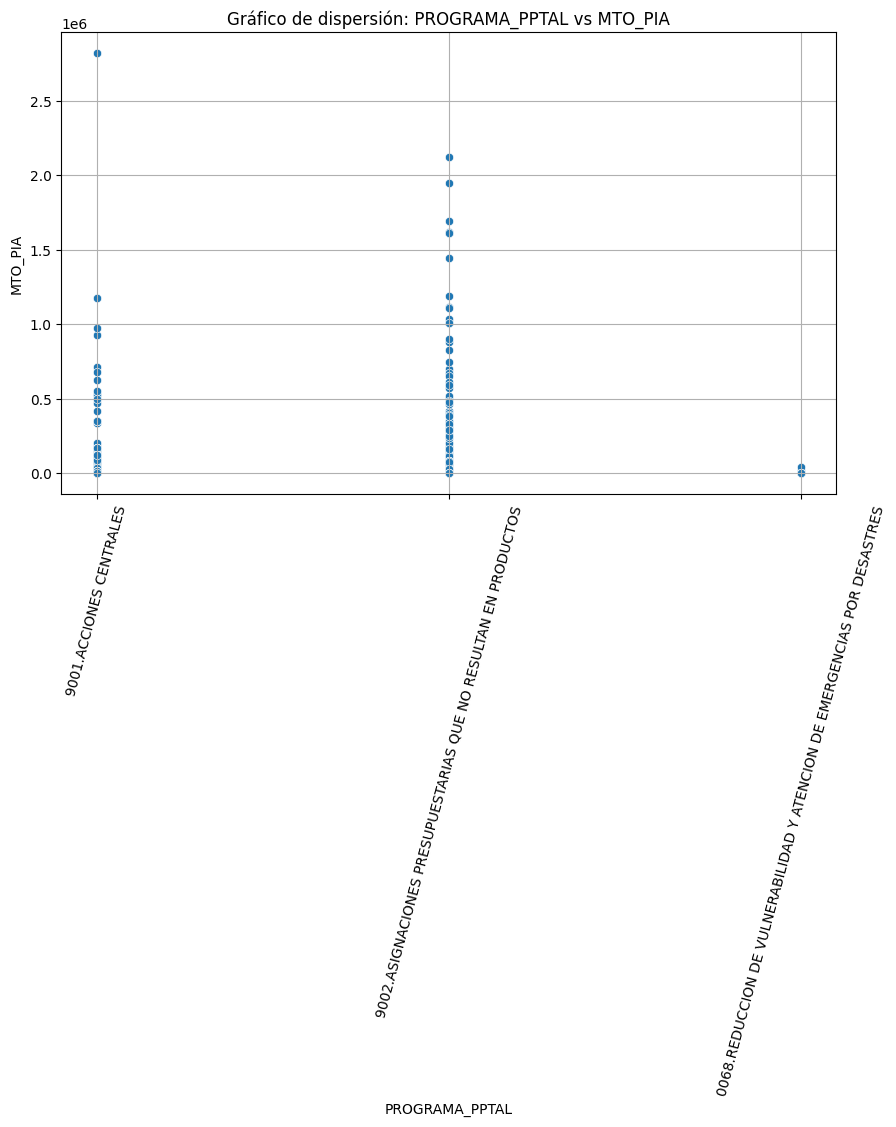

In [10]:
show_frequency_unique_values(df_train, "PROGRAMA_PPTAL")

# Graficar el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x="PROGRAMA_PPTAL", y="MTO_PIA", data=df_train)
plt.title("Gráfico de dispersión: PROGRAMA_PPTAL vs MTO_PIA")
plt.xlabel("PROGRAMA_PPTAL")
plt.ylabel("MTO_PIA")
plt.grid(True)

# Obtener las posiciones de las marcas del eje x
xticks_positions = scatterplot.get_xticks()

# Rotar las etiquetas del eje x en 90 grados
scatterplot.set_xticks(xticks_positions)
scatterplot.set_xticklabels(scatterplot.get_xticklabels(), rotation=75)

plt.show()

# Codificar la variable PROGRAMA_PPTAL

# Extraer la parte numerica de PROGRAMA_PPTAL hasta el punto y pasar la variable a tipo numeric
extrac_numeric_to_dot(df_train, "PROGRAMA_PPTAL")
extrac_numeric_to_dot(df_test, "PROGRAMA_PPTAL")

# Codificar la variable PROGRAMA_PPTAL
# a) Acciones centrales (9001)
# b) Acciones presupuestales que no terminan en productos  (9002)
# c) Programas presupuestales (1-148)
# d) Meta presupuestaria (default)
def code_programa_pptal(df): #
    df.insert(df.columns.get_loc("PROGRAMA_PPTAL"), "ACCIONES_CENT", 0)
    df.insert(df.columns.get_loc("PROGRAMA_PPTAL"), "ACCIONES_PRES_NO_PRODUC", 0)
    df.insert(df.columns.get_loc("PROGRAMA_PPTAL"), "PROGRAMAS_PRESU", 0)

    df["ACCIONES_CENT"] = np.where(df["PROGRAMA_PPTAL"] == 9001, 1, 0)
    df["ACCIONES_PRES_NO_PRODUC"] = np.where(df["PROGRAMA_PPTAL"] == 9002, 1, 0)
    df["PROGRAMAS_PRESU"] = np.where((df["PROGRAMA_PPTAL"] >= 1) & (df["PROGRAMA_PPTAL"] <= 148), 1, 0)
    df.drop(columns=["PROGRAMA_PPTAL"], axis=1, inplace=True)


code_programa_pptal(df_train)
code_programa_pptal(df_test)

# FALTA ACTUALIZAR META DATA

#### Variable categórica TIPO_PROD_PROY

En este caso como la variable solo presenta 2 valores: 
* PRODUCTO
* PROYECTO 
Es por ello que se decide codificar en valores binarios 0 y 1 para PRODUCTO Y PROYECTO respectivamente.

En este caso, para "TIPO_PROD_PROY", el coeficiente de correlación de punto biserial es cercano a cero y el valor p es mayor que el nivel de significancia típico. Esto indica una correlación muy débil y no significativa entre "TIPO_PROD_PROY" y "MTO_PIA".

In [11]:
show_frequency_unique_values(df_train, "TIPO_PROD_PROY")

def code_tipo_prod_proy(df):
    # Usando replace para codificar las categorías en valores binarios
    df["TIPO_PROD_PROY"] = df["TIPO_PROD_PROY"].infer_objects(copy=False).replace({"3.PRODUCTO": 0, "2.PROYECTO": 1})
    df["TIPO_PROD_PROY"] = pd.to_numeric(df["TIPO_PROD_PROY"])


code_tipo_prod_proy(df_train)
code_tipo_prod_proy(df_test)
          
# Calcula el coeficiente de correlación de punto biserial
relation_punto_biserial(df_train, "TIPO_PROD_PROY", "MTO_PIA")

TIPO_PROD_PROY
3.PRODUCTO    1458
2.PROYECTO       6
Name: count, dtype: int64
Coeficiente de correlación de punto biserial: -0.01650638355158484
Valor p: 0.52799151880516


/tmp/ipykernel_6050/3597589843.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["TIPO_PROD_PROY"] = df["TIPO_PROD_PROY"].infer_objects(copy=False).replace({"3.PRODUCTO": 0, "2.PROYECTO": 1})


#### Variable catégorica PRODUCTO_PROYECTO
Al evaluar esta variable se detecto que hay cierta diferencia significativa entre los elementos que figuran en la data de train y test.
Además, en la data que se observa que hay una concentración en el valor "3999999.SIN PRODUCTO" y mucho menor en todos los demas valores.

Para "PRODUCTO_PROYECTO", aunque los datos de entrenamiento y prueba pueden ser diferentes, la variable muestra una relación significativa con la variable objetivo segun lo obtenido por la prueba de Mann-Whitney U, es más prudente mantenerla en el modelo para aprovechar su capacidad predictiva.

Valores y frecuencia en train.csv: 
PRODUCTO_PROYECTO
0    1453
1      11
Name: count, dtype: int64

 Valores y frecuencia en test.csv:  
PRODUCTO_PROYECTO
0    1453
1      11
Name: count, dtype: int64

Estadístico de la prueba de Mann-Whitney U: 10774.5
Valor p de la prueba de Mann-Whitney U: 0.04508235385965838


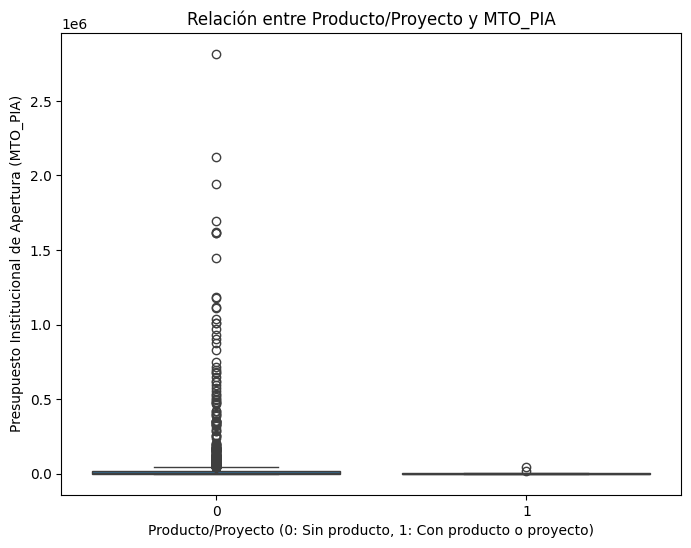

In [12]:
# DESCOMENTAR PARA VER LOS VALORES ORIGINALES UNICOS DE LA VARIABLE
# print( "Valores y frecuencia en train.csv: ")
# show_frequency_unique_values(df_train, "PRODUCTO_PROYECTO")
# print("\n Valores y frecuencia en test.csv:  ")
# show_frequency_unique_values(df_test, "PRODUCTO_PROYECTO", "\n")

## Codificar a binario 0 -> 3999999.SIN PRODUCTO y 1 para el resto
def code_producto_proyecto(df):
    df["PRODUCTO_PROYECTO"] = np.where(df["PRODUCTO_PROYECTO"] == "3999999.SIN PRODUCTO", 0, 1)

code_producto_proyecto(df_train)
code_producto_proyecto(df_test)

print("Valores y frecuencia en train.csv: ")
show_frequency_unique_values(df_train, "PRODUCTO_PROYECTO")
print("\n Valores y frecuencia en test.csv:  ")
show_frequency_unique_values(df_test, "PRODUCTO_PROYECTO")
print()

relation_de_Mann_Whitney(df_train, "PRODUCTO_PROYECTO")

# Crear un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x="PRODUCTO_PROYECTO", y="MTO_PIA", data=df_train)
plt.xlabel("Producto/Proyecto (0: Sin producto, 1: Con producto o proyecto)")
plt.ylabel("Presupuesto Institucional de Apertura (MTO_PIA)")
plt.title("Relación entre Producto/Proyecto y MTO_PIA")
plt.show()

#### Variable categórica TIPO_ACT_OBRA_ACCINV
Similar a las variables anteriores, se decide codificar en valores binarios 0 y 1 para ACTIVIDAD y ACCION INVERSION respectivamente, ya que solo presenta 2 valores.

En este caso se comporta de manera identica a la variable TIPO_PROD_PROY, es decir, no presenta una correlación significativa con la variable objetivo a simple vista.

In [13]:
def code_tipo_act_obra_accinv(df):
    df["TIPO_ACT_OBRA_ACCINV"] = np.where(df["TIPO_ACT_OBRA_ACCINV"] == "5.ACTIVIDAD", 0, 1)

code_tipo_act_obra_accinv(df_train)
code_tipo_act_obra_accinv(df_test)

relation_punto_biserial(df_train, "TIPO_ACT_OBRA_ACCINV")

print()
show_frequency_unique_values(df_train, "TIPO_ACT_OBRA_ACCINV")

Coeficiente de correlación de punto biserial: -0.01650638355158484
Valor p: 0.52799151880516

TIPO_ACT_OBRA_ACCINV
0    1458
1       6
Name: count, dtype: int64


#### Variable categórica ACT_OBRA_ACCINV
En este caso se decide codificar esta variable en base a su valor numerico hasta el punto, es decir, en base a cada codigo.


In [14]:
show_frequency_unique_values(df_train, "ACT_OBRA_ACCINV")

# codificando la variable ACT_OBRA_ACCINV

extrac_numeric_to_dot(df_train, "ACT_OBRA_ACCINV")
extrac_numeric_to_dot(df_test, "ACT_OBRA_ACCINV")

ACT_OBRA_ACCINV
5002358.GESTION DE LAS PRESTACIONES SOCIALES                                     797
5000003.GESTION ADMINISTRATIVA                                                   588
5001253.TRANSFERENCIA DE RECURSOS PARA LA EJECUCION DE PROYECTOS DE INVERSION     18
5000005.GESTION DE RECURSOS HUMANOS                                               18
5000004.ASESORAMIENTO TECNICO Y JURIDICO                                          11
5000001.PLANEAMIENTO Y PRESUPUESTO                                                11
5000002.CONDUCCION Y ORIENTACION SUPERIOR                                         10
5005582.IMPLEMENTACION DE MEDIDAS DE PROTECCION ANTE BAJAS TEMPERATURAS            5
6000001.EXPEDIENTE TECNICO                                                         5
6000032.ESTUDIOS DE PRE - INVERSION                                                1
Name: count, dtype: int64


<Figure size 1000x1000 with 0 Axes>

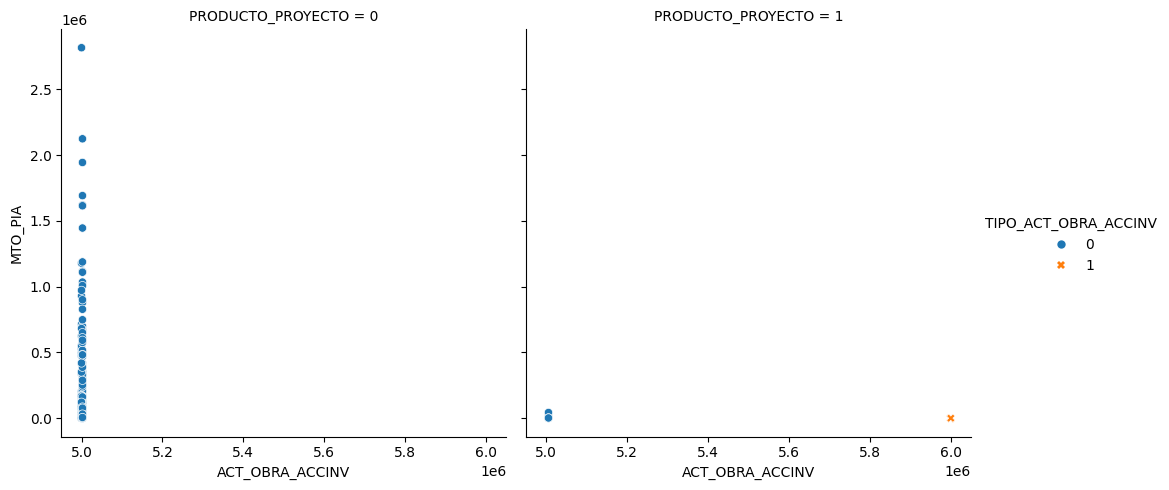

In [15]:
## Ploteando la relación entre la variable ACT_OBRA_ACCINV y MTO_PIA
plt.figure(figsize=(10, 10))
sns.relplot(    x="ACT_OBRA_ACCINV", y="MTO_PIA", data=df_train,  col="PRODUCTO_PROYECTO", hue="TIPO_ACT_OBRA_ACCINV", style="TIPO_ACT_OBRA_ACCINV", kind="scatter")
plt.show()

#### Variable categórica DIVISION_FN y GRUPO_FN
Esta es una variable categorica que es parte del clasificador funcional de los clasificadores presupuestales. Segun la información encontrada en https://intranet.uncp.edu.pe/sites/uncp.edu/files/institucional/oficina/abastecimientos/manual_clasificador_gastos.pdf en la pagina 9, se indica que Funcion es el primer nivel de desagregación del Clasificador Funcional, en este caso DIVISION_FN, es el segundo y GRUPO_FN es el tercer nivel de desagregación del Clasificador Funcional.

Además se indica que la estructura está conformada por:
|           | Cantidad |
|----------------------|----------|
| Funciones  FUNCION          | 25       |
| Programas  DIVISION_FN      | 53       |
| Subprogramas  GRUPO_FN      | 118      |


Por lo tanto se decide codificar estas variables en base a su numero de clasificador hasta el punto, es decir, en base a cada codigo ya que hay un solo valor en la data de FUNCION tanto en train como en test.

In [16]:
show_frequency_unique_values(df_train, "DIVISION_FN")
show_frequency_unique_values(df_train, "GRUPO_FN")

# Codificar la variable DIVISION_FN
extrac_numeric_to_dot(df_train, "DIVISION_FN")
extrac_numeric_to_dot(df_test, "DIVISION_FN")


# Codificar la variable GRUPO_FN
extrac_numeric_to_dot(df_train, "GRUPO_FN")
extrac_numeric_to_dot(df_test, "GRUPO_FN")






DIVISION_FN
051.ASISTENCIA SOCIAL                   821
006.GESTION                             627
004.PLANEAMIENTO GUBERNAMENTAL           11
016.GESTION DE RIESGOS Y EMERGENCIAS      5
Name: count, dtype: int64
GRUPO_FN
0114.DESARROLLO DE CAPACIDADES SOCIALES Y ECONOMICAS        821
0008.ASESORAMIENTO Y APOYO                                  599
0011.PREPARACION Y PERFECCIONAMIENTO DE RECURSOS HUMANOS     18
0005.PLANEAMIENTO INSTITUCIONAL                              11
0007.DIRECCION Y SUPERVISION SUPERIOR                        10
0035.PREVENCION DE DESASTRES                                  5
Name: count, dtype: int64


#### Variable FINALIDAD
En base a los valores de la variable FINALIDAD, se decide codificar en base a su valor numerico hasta el punto, es decir, en base a cada codigo. Ya que, el codigo se puede repetir y ademas en la data de test aparecen valores que no estan en la data de train con codigos diferentes lo que hace imposible aplicar otra codificación.

In [17]:
# show_frequency_unique_values(df_train, "FINALIDAD")

extrac_numeric_to_dot(df_train, "FINALIDAD")
extrac_numeric_to_dot(df_test, "FINALIDAD")

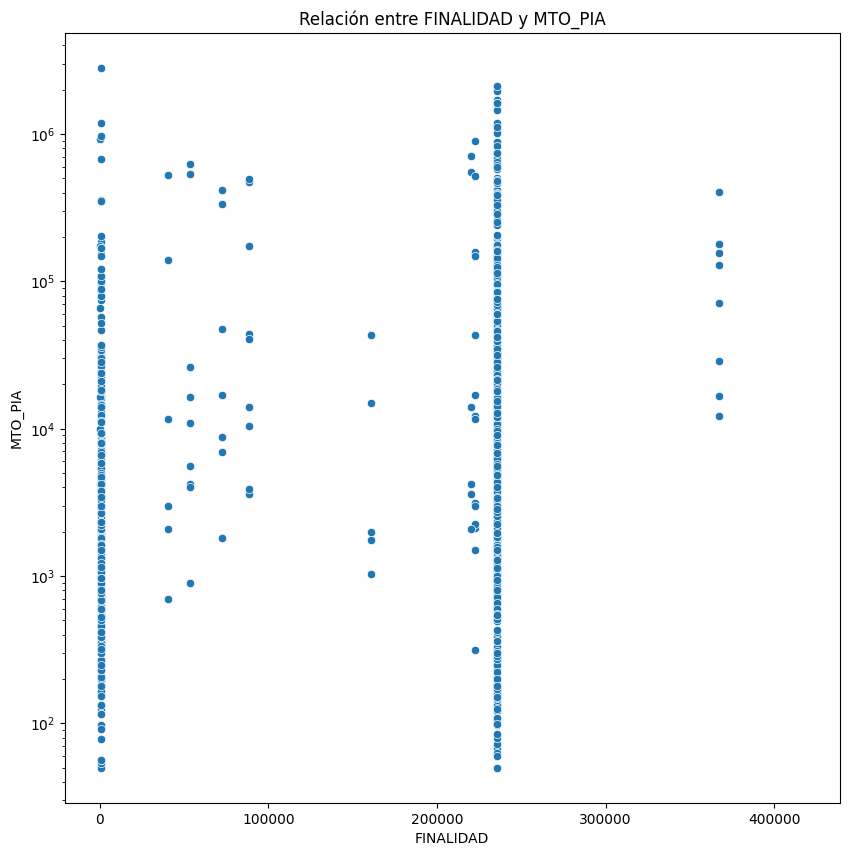

In [18]:
# plotear ahora la relación entre FINALIDAD y MTO_PIA con y en escala logaritmica
plt.figure(figsize=(10, 10))
sns.scatterplot(x="FINALIDAD", y="MTO_PIA", data=df_train)
plt.yscale("log")
plt.title("Relación entre FINALIDAD y MTO_PIA")
plt.xlabel("FINALIDAD")
plt.ylabel("MTO_PIA")
plt.show()

#### Variable categórica UNIDAD_MEDIDA
Como el codigo de esta variable va en relación al orden lexicografico del nombre de las unidades de medida, entonces se codifica de esa misma manera.

Luego de procesar esta variable, analizamos la correlación usando la Correlación de Pearson, donde el resultado muestra que en general, con un valor p tan bajo como 0.0016..., se puede considerar que la correlación observada es estadísticamente significativa. Por lo tanto, se puede concluir que hay evidencia suficiente para sugerir que la correlación entre las dos variables no es el resultado del azar.
En resumen, aunque la correlación entre las dos variables es débil, es estadísticamente significativa, lo que indica que hay una relación real entre las variables, aunque no muy fuerte.

In [19]:
show_frequency_unique_values(df_train, "UNIDAD_MEDIDA")

# codificar la variable UNIDAD_MEDIDA
extrac_numeric_to_dot(df_train, "UNIDAD_MEDIDA")
extrac_numeric_to_dot(df_test, "UNIDAD_MEDIDA")

# Ver si hay relacion entre la variable UNIDAD_MEDIDA y MTO_PIA usando correlación o covarianza
correlation_coefficient, p_value = stats.pearsonr(df_train["UNIDAD_MEDIDA"], df_train["MTO_PIA"])
print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("Valor p:", p_value)

UNIDAD_MEDIDA
00043.ESTABLECIMIENTO            744
00248.REPORTE                    523
00060.INFORME                    130
00152.USUARIO                     36
00096.PROYECTO                    18
00086.PERSONA                      5
00054.EXPEDIENTE TECNICO           5
00001.ACCION                       2
00213.ESTUDIO DE PREINVERSION      1
Name: count, dtype: int64
Coeficiente de correlación de Pearson: -0.10652298975489023
Valor p: 4.4276042270249564e-05


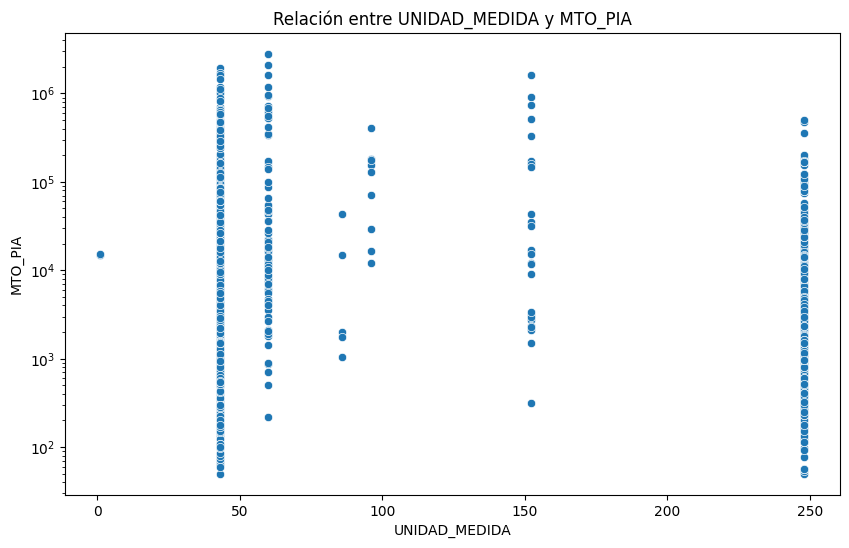

In [20]:
# Visualizar la relación entre la variable UNIDAD_MEDIDA y MTO_PIA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="UNIDAD_MEDIDA", y="MTO_PIA", data=df_train)
plt.title("Relación entre UNIDAD_MEDIDA y MTO_PIA")
plt.yscale("log")
plt.xlabel("UNIDAD_MEDIDA")
plt.ylabel("MTO_PIA")
plt.show()


#### Variable categórica DEPARTAMENTO, PROVINCIA y DISTRITO
En este caso, se decide usar la variable ubigeo para codificar estas variables ya que el ubigeo es un identificador único para cada departamento, provincia y distrito.

UBIGEO:
2 primeros digitos: Departamento
2 siguientes: Provincia
2 ultimos: Distrito

Y además, quitamos la variable ubigeo.

In [21]:
# codificar ubigeo en tres columnas  DEPARTAMENTO, PROVINCIA, DISTRITO
def split_ubigeo(df, column_name):
    df[column_name] = df[column_name].astype(str)
    df["DEPARTAMENTO"] = df[column_name].str[:2]
    df["PROVINCIA"] = df[column_name].str[2:4]
    df["DISTRITO"] = df[column_name].str[4:]
    # Convertir las columnas a tipo numérico
    df_train["DEPARTAMENTO"] = pd.to_numeric(df_train["DEPARTAMENTO"])
    df_train["PROVINCIA"] = pd.to_numeric(df_train["PROVINCIA"])
    df_train["DISTRITO"] = pd.to_numeric(df_train["DISTRITO"])


# Split ubigeo
split_ubigeo(df_train, "UBIGEO")
split_ubigeo(df_test, "UBIGEO")

# Eliminar la columna UBIGEO
remove_columns(df_train, df_test, df_meta, ["UBIGEO"])

#### Variables categóricas  CATEGORIA_GASTO, GENERICA, SUBGENERICA, SUBGENERICA_DET, ESPECIFICA y ESPECIFICA_DET
Estas 6 variables son la codificación del clasificador de ingresos y gastos. Ello según https://intranet.uncp.edu.pe/sites/uncp.edu/files/institucional/oficina/abastecimientos/manual_clasificador_gastos.pdf en la pagina 40. 

Estructura del Clasificador de Ingresos y Gastos

| Campo               | Número de Dígitos |
|---------------------|-------------------|
| Tipo de Transacción| 1                 |
| Genérica            | 1                 |
| Subgenérica         | 2                 |
| Específica Nivel 1  | 2                 |
| Subgenérica         | 2                 |
| Específica Nivel 2  | 2                 |


Por lo tanto se decide codificar estas variables en base a su valor numerico hasta el punto, es decir, en base a cada codigo de los elementos de las variables.

In [22]:
# Codificar las 6 variables
def code_clasificador_ing_gast(df):
    extrac_numeric_to_dot(df, "CATEGORIA_GASTO")
    extrac_numeric_to_dot(df, "GENERICA")
    extrac_numeric_to_dot(df, "SUBGENERICA")
    extrac_numeric_to_dot(df, "SUBGENERICA_DET")
    extrac_numeric_to_dot(df, "ESPECIFICA")
    extrac_numeric_to_dot(df, "ESPECIFICA_DET")

code_clasificador_ing_gast(df_train)
code_clasificador_ing_gast(df_test)


## Matriz de correlación

Se observa que directamente no existe una correlación fuerte entre las variables y la variable objetivo. Sin embargo, es posible que existan relaciones entre los conjuntos de variables que se observan a niveles dimensionales más altos. Por lo que a continuacion se realiza un grafico de coordenadas paralelas tener otra visión de la data.

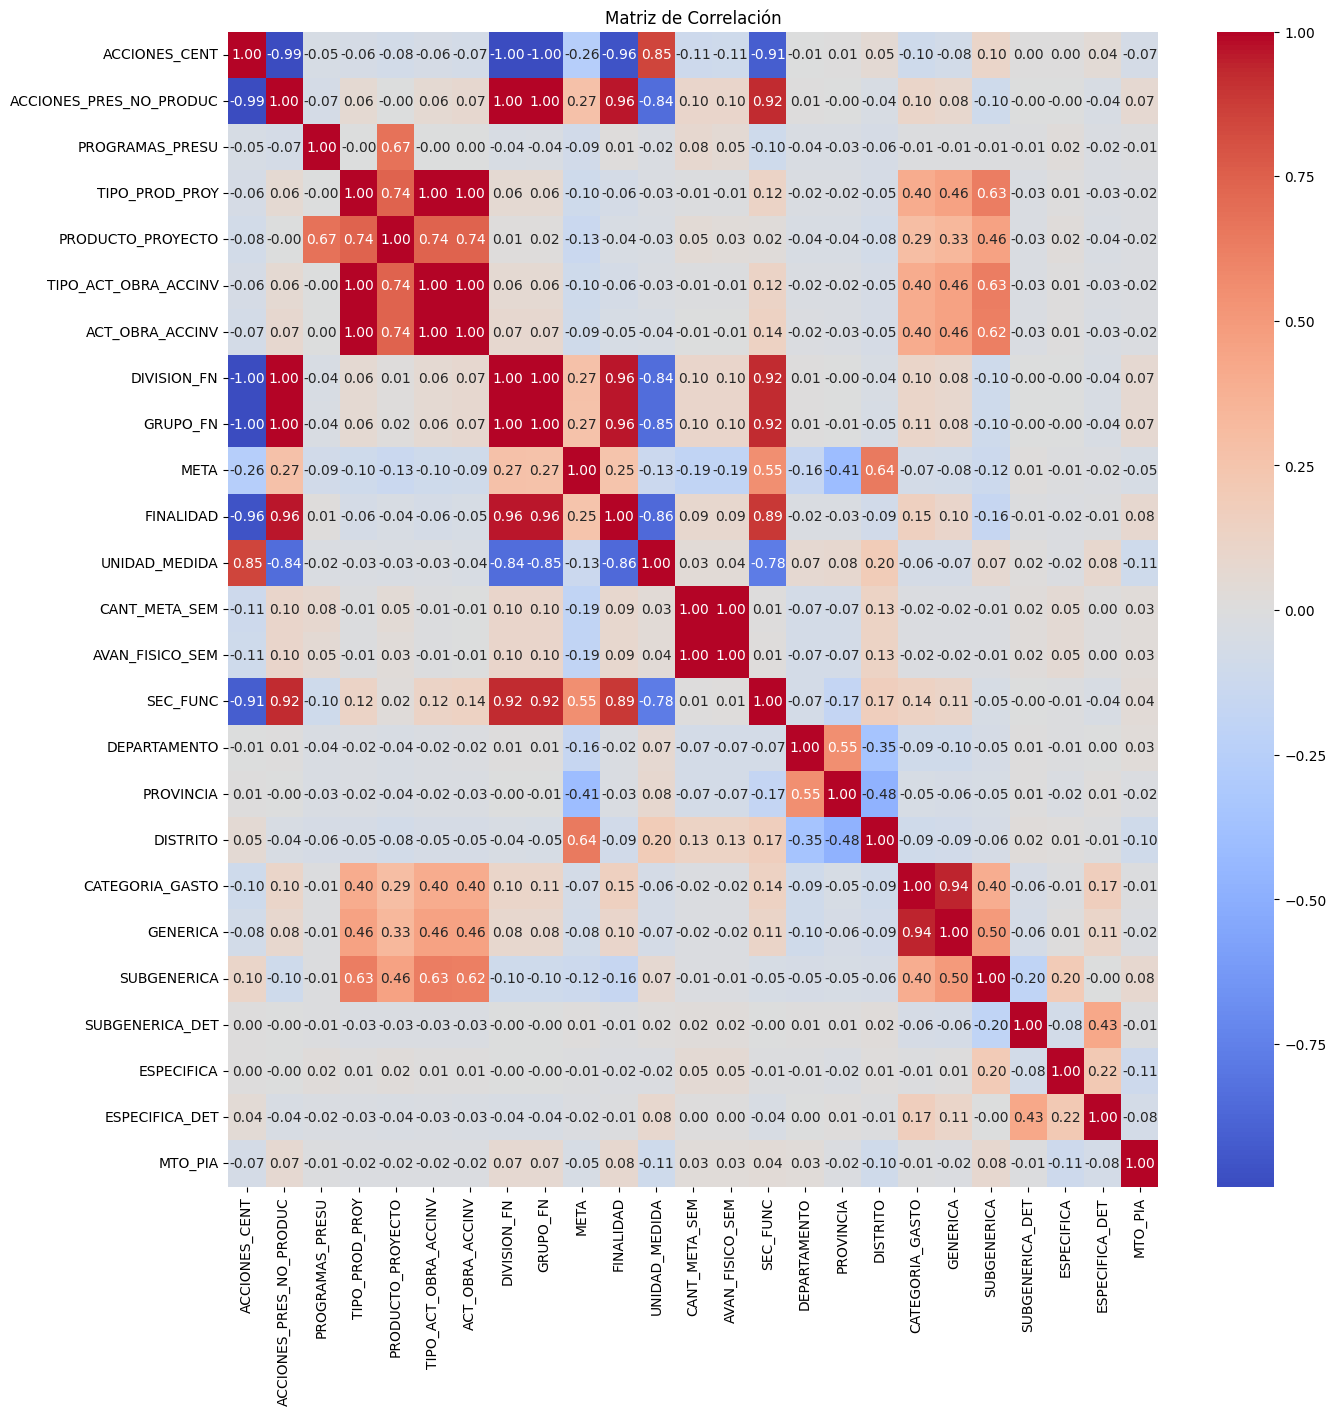

In [23]:
matriz_correlacion = df_train.corr()
# Visualizar matriz de correlación como mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Gráficos de Coordenadas Paralelas para observar patrones (VARIABLES ACTUALES TODAS)

In [24]:
def plot_parallel_coordinates(df, target="MTO_PIA", color_scl="Jet"):
    fig = go.Figure(data=go.Parcoords(
        line=dict(color=df[target],
                  colorscale=color_scl,
                  cmin=df[target].min(),
                  cmax=df[target].max()),
        dimensions=[dict(range=[df[column].min(), df[column].max()],
                         label=column,
                         values=df[column]) for column in df.columns]
    ))
    # Actualizar la configuración del layout para rotar los labels a vertical
    fig.update_layout(title="Parallel Coordinates Plot", height=1000, width=4000,
                      xaxis=dict(tickangle=90),
                      yaxis=dict(tickangle=0))
    fig.show()

plot_parallel_coordinates(df_train, color_scl= [ [0.0, "green"],[0.05, "yellow"], [0.1, "red"], [0.15, "blue"], [0.2, "orange"], [0.25, "cyan"], [0.3, "gray"], [0.5, "pink"], [0.75, "black"], [1.0, "purple"]])

In [25]:
# Guardar en datasets_procesados

df_train.to_csv("./datasets_procesados/train.csv", index=False)
df_test.to_csv("./datasets_procesados/test.csv", index=False)